# PCA Project

House Price Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Dataset

In [2]:
mydata = pd.read_csv("houseprice.csv")

In [3]:
mydata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
mydata.shape

(1460, 81)

# Deriving the Information of the Dataset

In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
mydata.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Checking for Null Values

In [7]:
pd.set_option('display.max_rows', 500)
mydata.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [8]:
mydata.shape

(1460, 81)

# Dropping Columns

In [9]:
mydata1 = mydata.drop(["Alley","Utilities","FireplaceQu","PoolQC","Fence","MiscFeature"],axis=1)

In [10]:
mydata1.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

# Dropping Null Values

In [11]:
mydata1.dropna(inplace=True,axis=0)

In [12]:
mydata1.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

# Label Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
LE=LabelEncoder()

In [15]:
for i in mydata1:
    mydata1[i] = LE.fit_transform(mydata1[i].astype(str).values)

In [16]:
mydata1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1094 non-null   int32
 1   MSSubClass     1094 non-null   int32
 2   MSZoning       1094 non-null   int32
 3   LotFrontage    1094 non-null   int32
 4   LotArea        1094 non-null   int32
 5   Street         1094 non-null   int32
 6   LotShape       1094 non-null   int32
 7   LandContour    1094 non-null   int32
 8   LotConfig      1094 non-null   int32
 9   LandSlope      1094 non-null   int32
 10  Neighborhood   1094 non-null   int32
 11  Condition1     1094 non-null   int32
 12  Condition2     1094 non-null   int32
 13  BldgType       1094 non-null   int32
 14  HouseStyle     1094 non-null   int32
 15  OverallQual    1094 non-null   int32
 16  OverallCond    1094 non-null   int32
 17  YearBuilt      1094 non-null   int32
 18  YearRemodAdd   1094 non-null   int32
 19  RoofSt

In [17]:
mydata1.shape

(1094, 75)

# Correlation

In [18]:
mydata_corr = mydata1.corr()

In [19]:
mydata_corr

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.028759,-0.047540,0.009400,-0.022055,0.016113,-0.010284,-0.027335,0.003617,0.043798,...,0.026340,-0.013906,0.004208,-0.025180,0.046182,0.018859,0.042492,-0.006552,-0.028341,0.021685
MSSubClass,0.028759,1.000000,0.032014,0.194137,0.000545,-0.011896,-0.051729,-0.065746,-0.057616,0.007673,...,0.102165,-0.001463,-0.018871,0.046732,0.015569,0.030916,-0.029993,0.079277,-0.048830,-0.021134
MSZoning,-0.047540,0.032014,1.000000,-0.057253,-0.007628,0.118349,0.055222,-0.021917,-0.027070,-0.026999,...,0.130246,-0.000932,-0.014877,-0.002980,-0.028150,-0.007977,-0.030517,0.111368,-0.001727,-0.156131
LotFrontage,0.009400,0.194137,-0.057253,1.000000,0.013929,0.074483,0.016713,0.040979,0.081635,-0.009780,...,-0.011308,0.028816,-0.010084,-0.000964,0.042876,0.025247,-0.023648,-0.007145,-0.005294,-0.008739
LotArea,-0.022055,0.000545,-0.007628,0.013929,1.000000,-0.024815,0.159729,-0.000597,0.088394,-0.005618,...,0.078451,-0.060627,-0.053661,-0.016414,0.004137,-0.009582,0.013444,0.021731,-0.058443,-0.195495
Street,0.016113,-0.011896,0.118349,0.074483,-0.024815,1.000000,-0.017107,0.131767,0.005361,-0.179254,...,0.019738,0.006568,-0.049771,0.004041,-0.208269,-0.030121,-0.043781,0.028487,0.018246,-0.037978
LotShape,-0.010284,-0.051729,0.055222,0.016713,0.159729,-0.017107,1.000000,0.114479,0.122071,-0.073328,...,0.054929,-0.005290,-0.063219,-0.008356,0.046462,-0.033217,0.048080,-0.010195,-0.079138,-0.234063
LandContour,-0.027335,-0.065746,-0.021917,0.040979,-0.000597,0.131767,0.114479,1.000000,-0.024009,-0.368562,...,-0.039389,-0.005434,0.026071,0.006981,0.001521,0.015013,0.016827,-0.038044,-0.001244,-0.032086
LotConfig,0.003617,-0.057616,-0.027070,0.081635,0.088394,0.005361,0.122071,-0.024009,1.000000,0.033187,...,-0.059263,0.006174,-0.035088,-0.020064,0.005086,0.037415,-0.033825,0.004205,0.030951,-0.016570
LandSlope,0.043798,0.007673,-0.026999,-0.009780,-0.005618,-0.179254,-0.073328,-0.368562,0.033187,1.000000,...,-0.032012,-0.011785,0.083620,-0.013905,0.009978,-0.002949,0.016066,0.045162,-0.066391,0.025866


# Data Visualization

<AxesSubplot:>

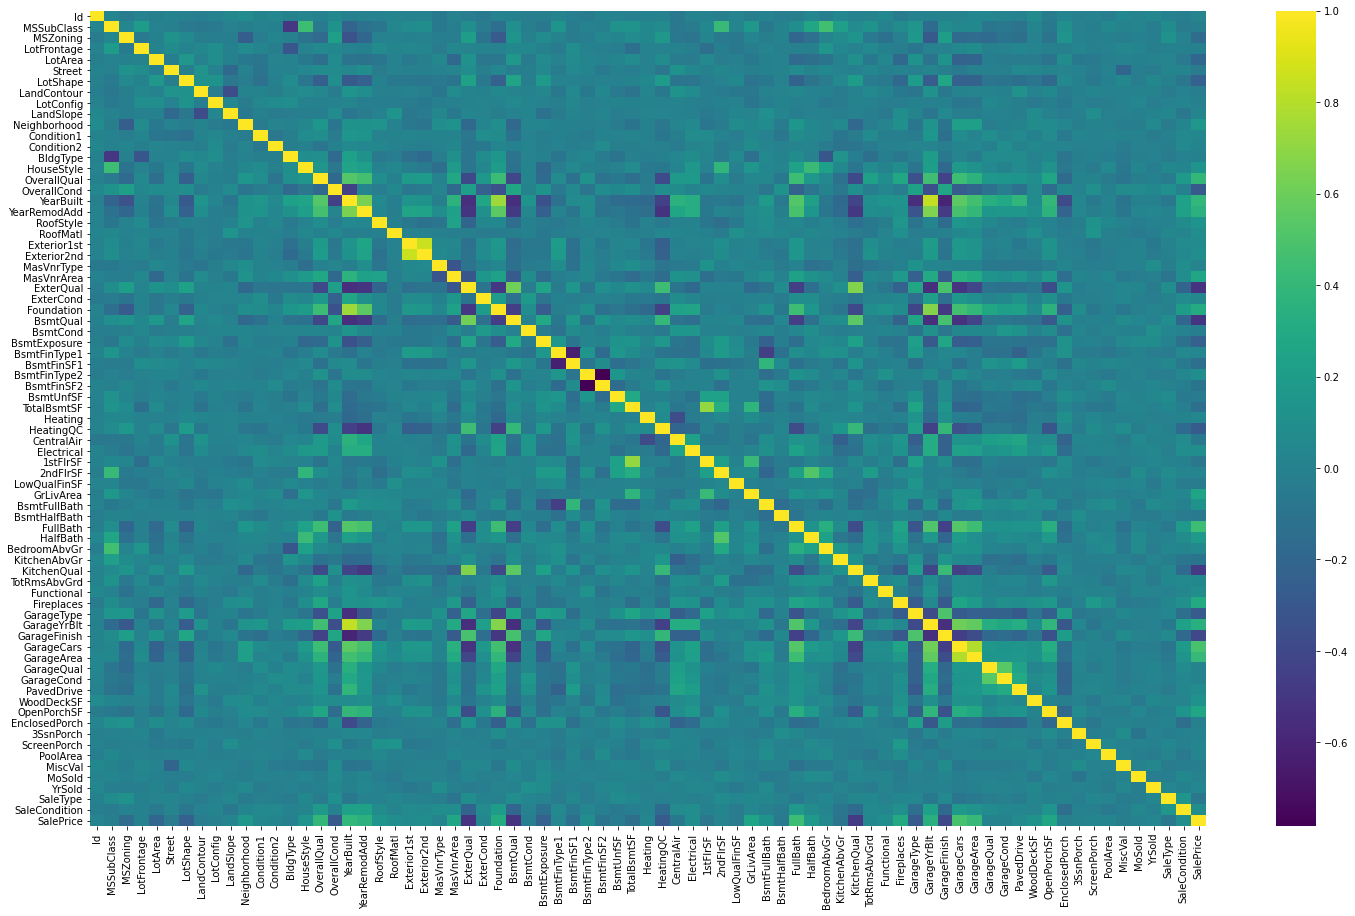

In [20]:
plt.figure(figsize=(25,15))
sns.heatmap(data=mydata_corr,annot=False,cmap='viridis')

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

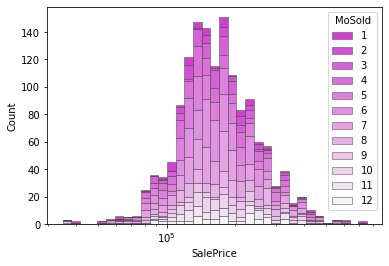

In [21]:
sns.histplot(mydata,x="SalePrice", hue="MoSold",multiple="stack",palette="light:m_r",edgecolor=".3",linewidth=.5,log_scale=True)

<AxesSubplot:xlabel='SalePrice', ylabel='GarageCars'>

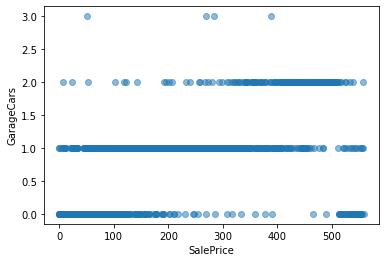

In [22]:
sns.regplot(x = "SalePrice", y="GarageCars", data=mydata1, fit_reg = False, scatter_kws={"alpha": 0.5})

<AxesSubplot:xlabel='MoSold', ylabel='SalePrice'>

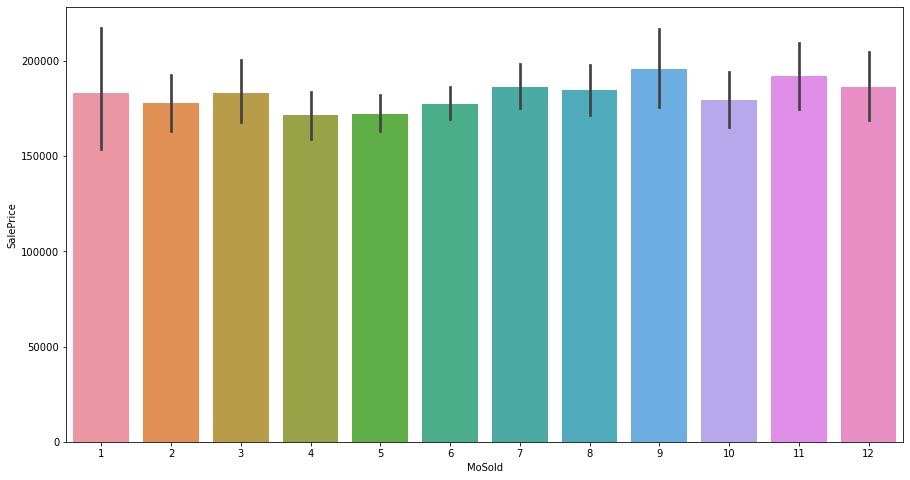

In [23]:
plt.figure(figsize=(15,8))
sns.barplot(x='MoSold',y='SalePrice',data=mydata)

<AxesSubplot:xlabel='MoSold', ylabel='GarageArea'>

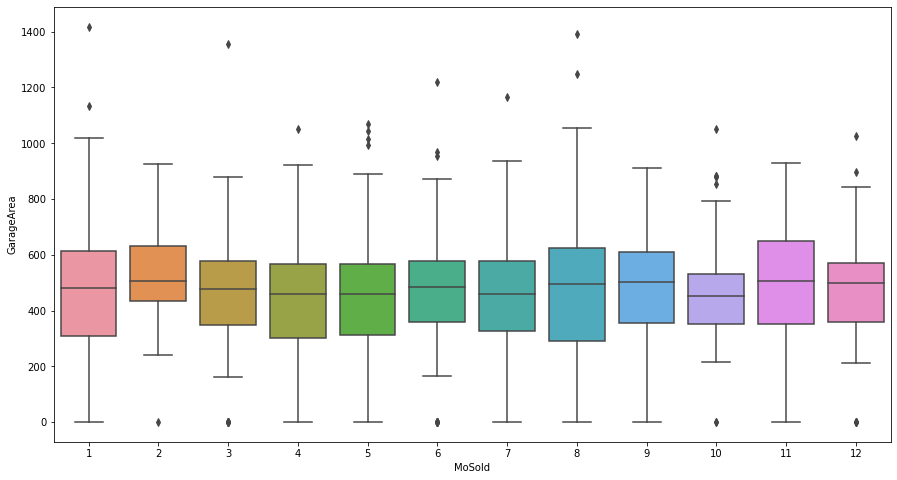

In [24]:
plt.figure(figsize=(15,8))
sns.boxplot(x='MoSold',y='GarageArea',data=mydata)

<Figure size 1800x1080 with 0 Axes>

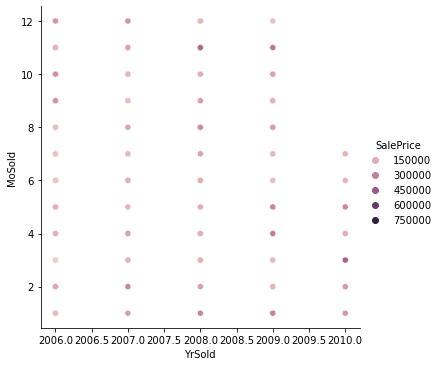

In [25]:
plt.figure(figsize=(25,15))
sns.relplot(x='YrSold',y='MoSold',data=mydata,hue='SalePrice')

<AxesSubplot:xlabel='MoSold', ylabel='SalePrice'>

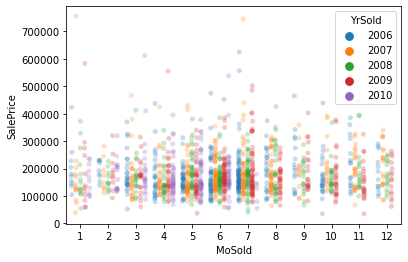

In [26]:
sns.stripplot(x="MoSold", y="SalePrice", hue="YrSold",
              data=mydata, dodge=True, alpha=.25, zorder=1)

# Declaring Dependent and Independent Variables

In [27]:
y_dep = mydata1.SalePrice

In [28]:
x_ind = mydata1.drop("SalePrice",axis=1)

# Random Forest Before PCA

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,train_size=0.8,random_state=2)

In [31]:
model_rf1=RandomForestRegressor(random_state=2)

In [32]:
model_rf1=model_rf1.fit(x_train,y_train)

In [33]:
y_pred1=model_rf1.predict(x_test)

In [34]:
y_pred1

array([332.81,  73.29, 139.7 , 145.77,  65.54,  93.84, 366.52, 127.97,
       342.52, 173.98, 191.16, 239.58, 292.89, 452.8 , 442.13, 326.57,
        94.74, 402.61,  86.86, 112.97, 232.81, 243.88, 387.13,  63.14,
       142.8 , 169.  , 382.32,  60.66, 460.23, 177.02, 449.3 , 213.97,
       246.73, 343.38, 492.82, 116.23, 423.79, 289.54, 121.78, 102.14,
        86.79, 230.48, 346.7 , 173.51, 187.77,  74.72, 110.  , 220.11,
        80.06, 233.2 , 243.5 , 363.39, 242.87, 274.48, 350.34, 359.62,
       354.45, 172.09, 318.93, 213.66, 308.3 ,  79.94, 107.65, 161.15,
       198.51,  87.35,  92.03, 194.03, 352.23,  64.65, 150.47,  61.59,
       206.52, 159.12,  67.82, 403.14, 184.88, 153.05, 455.61,  65.61,
       206.92, 180.09, 258.9 , 224.47, 198.7 , 139.75, 200.43, 169.13,
       267.2 , 162.22, 157.1 , 190.27,  96.38, 150.47, 276.59, 139.48,
       107.9 , 291.17, 193.95, 223.38,  88.82, 419.97, 125.56, 373.88,
       229.7 , 290.68, 252.58, 144.18, 208.93, 257.  ,  96.67, 119.17,
      

In [35]:
model_rf1.score(x_train,y_train)

0.9337470749973006

# Mean Square Error

In [37]:
from sklearn.metrics import mean_squared_error as ms

In [39]:
mean_sqr = ms(y_test,y_pred1)
mean_sqr

10406.537652511415

# Root Mean Square Error

In [40]:
Sqrt_msr=np.sqrt(mean_sqr)
Sqrt_msr

102.01243871465584

# Normalising the Independent Variables

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
norm=StandardScaler()

In [43]:
x_norm=norm.fit_transform(x_ind)

# PCA

In [44]:
from sklearn.decomposition import PCA

In [45]:
pca_Reduce = PCA()

In [46]:
x_new = pca_Reduce.fit_transform(x_norm)

In [47]:
x_new

array([[-2.42706979,  1.04747382,  1.32614488, ...,  0.26348809,
        -0.05839979,  0.04349159],
       [ 0.34052113, -2.66563249,  1.00236336, ..., -0.45765967,
        -0.03824577, -0.14396166],
       [-2.91376348,  1.73521968,  1.77318293, ...,  0.33560739,
        -0.09442496, -0.0275831 ],
       ...,
       [-0.17752041,  0.5980257 ,  1.37324811, ...,  0.63119484,
         0.19753105,  0.3071589 ],
       [ 2.5344384 , -3.59298383, -0.88192716, ...,  0.47398265,
         0.14300181,  0.2840083 ],
       [ 1.34196515, -3.86091034,  1.60589772, ...,  0.30096305,
         0.12613739,  0.2014422 ]])

In [48]:
cov_mat=np.cov(x_norm.T)

In [49]:
eigen_val,eigen_vecs=np.linalg.eig(cov_mat)

In [50]:
explained_variance=pca_Reduce.explained_variance_ratio_

In [51]:
explained_variance

array([0.12650298, 0.04962522, 0.03720444, 0.03319824, 0.02928644,
       0.02803897, 0.02380921, 0.02253938, 0.02171446, 0.0203495 ,
       0.02011169, 0.01944377, 0.01777756, 0.01758585, 0.01728454,
       0.01689174, 0.01643943, 0.01632694, 0.01604531, 0.01511431,
       0.01502662, 0.01487636, 0.01451173, 0.01398699, 0.01396306,
       0.01361593, 0.01311697, 0.01286871, 0.01252568, 0.01231249,
       0.01199001, 0.01158657, 0.01141646, 0.01115388, 0.01092161,
       0.0106793 , 0.01046675, 0.01013227, 0.01008823, 0.00971498,
       0.00952152, 0.00932028, 0.00915739, 0.00884096, 0.00876329,
       0.00830401, 0.00812026, 0.00798918, 0.00772197, 0.00764126,
       0.00724251, 0.0068794 , 0.00656401, 0.00640905, 0.00598452,
       0.00589497, 0.00562318, 0.00540652, 0.00517743, 0.00512995,
       0.00471305, 0.00451421, 0.00444995, 0.0042121 , 0.00395197,
       0.00373268, 0.00325392, 0.00297998, 0.00254807, 0.00233858,
       0.00228937, 0.00218445, 0.00174011, 0.00115534])

In [52]:
list = [0.12650298, 0.04962522, 0.03720444, 0.03319824, 0.02928644,
       0.02803897, 0.02380921, 0.02253938, 0.02171446, 0.0203495 ,
       0.02011169, 0.01944377, 0.01777756, 0.01758585, 0.01728454,
       0.01689174, 0.01643943, 0.01632694, 0.01604531, 0.01511431,
       0.01502662, 0.01487636, 0.01451173, 0.01398699, 0.01396306,
       0.01361593, 0.01311697, 0.01286871, 0.01252568, 0.01231249,
       0.01199001, 0.01158657, 0.01141646, 0.01115388, 0.01092161,
       0.0106793 , 0.01046675, 0.01013227, 0.01008823, 0.00971498,
       0.00952152, 0.00932028, 0.00915739, 0.00884096, 0.00876329,
       0.00830401, 0.00812026, 0.00798918, 0.00772197, 0.00764126,
        0.00724251, 0.0068794 , 0.00656401, 0.00640905, 0.00598452,
       0.00589497, 0.00562318, 0.00540652, 0.00517743, 0.00512995 ]

sum(list)

0.9559362400000001

<BarContainer object of 74 artists>

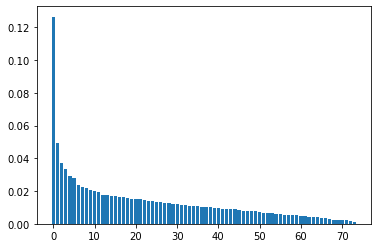

In [53]:
plt.figure(figsize=(6,4))
plt.bar(range(74),explained_variance,label="information gained by each pca")

In [54]:
pca=PCA(n_components=60)

In [55]:
x_new_info=pca.fit_transform(x_norm)

In [56]:
x_new_info

array([[-2.42706979,  1.04747382,  1.32614488, ...,  0.32952708,
        -0.04726529,  0.50107836],
       [ 0.34052113, -2.66563249,  1.00236336, ..., -1.29186964,
         0.60038454, -0.28897802],
       [-2.91376348,  1.73521968,  1.77318293, ...,  0.4985703 ,
         0.4664054 ,  0.57354796],
       ...,
       [-0.17752041,  0.5980257 ,  1.37324811, ...,  1.43331647,
         0.32054179, -1.39227397],
       [ 2.5344384 , -3.59298383, -0.88192716, ...,  0.81435902,
         0.48063762,  0.58949143],
       [ 1.34196515, -3.86091034,  1.60589772, ..., -0.85672822,
        -0.86378601, -0.65359648]])

# Performing Random Forest after PCA

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x_new_info,y_dep,train_size=0.8,random_state=2)

In [59]:
model_rf=RandomForestRegressor(random_state=2)

In [60]:
model_rf=model_rf.fit(x_train,y_train)

In [61]:
y_pred_rf=model_rf.predict(x_test)

In [62]:
y_pred_rf

array([304.96, 103.64, 161.92, 180.65,  66.73,  99.11, 344.35, 120.47,
       404.54, 134.55, 189.53, 191.92, 237.13, 454.17, 428.95, 387.99,
       124.15, 401.54, 120.16,  89.18, 240.87, 197.61, 462.94,  93.77,
       124.89, 234.41, 252.07, 263.01, 424.79,  92.85, 459.51, 135.78,
       173.37, 302.35, 456.63, 233.51, 395.48, 289.25, 124.29,  94.06,
       173.73, 278.5 , 396.05, 156.8 , 184.85, 118.34, 141.67, 240.33,
       106.52, 214.71, 277.16, 319.75, 204.1 , 266.29, 306.35, 397.04,
       192.04, 190.85, 297.5 , 256.51, 264.61, 120.86, 112.4 , 196.01,
       226.03, 127.38, 172.59, 220.57, 314.62, 147.48, 231.27,  62.48,
       300.3 , 166.46,  83.26, 402.04, 254.81, 160.42, 454.9 , 219.07,
       225.02, 223.16, 278.28, 151.32, 206.04, 197.42, 189.37, 256.71,
       210.51, 132.04, 113.01, 176.54, 158.69, 138.28, 272.51, 199.09,
       138.84, 271.11, 112.65, 180.36,  87.34, 145.95, 112.94, 378.92,
       262.36, 293.94, 218.89, 158.21, 243.94, 274.08,  94.07, 191.67,
      

In [63]:
model_rf.score(x_train,y_train)

0.9206688410340966

# Mean Square Error

In [64]:
from sklearn.metrics import mean_squared_error as ms

In [65]:
mean_sqr_rf = ms(y_test,y_pred_rf)
mean_sqr_rf

11758.18702283105

# Root Mean Square Error

In [66]:
Sqrt_msr_rf=np.sqrt(mean_sqr_rf)
Sqrt_msr_rf

108.4351742878253

# Conclusion :

# The accuracy obtained before PCA using Random Forest is 93 % and the accuracy after PCA using optimum number of components in Random Forest is 92.06% 

# Since the accuracy obtained before and after PCA is of same range, the final accuracy of the model we got is 92.06% which is considered to be a good model